In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read the CSV file 
df = pd.read_csv('dataset.csv')

In [3]:
'''
Dataset link:https://www.kaggle.com/datasets/deepcontractor/200k-short-texts-for-humor-detection
Dataset Paper : https://arxiv.org/abs/2004.12765
Title : Colbert: Using bert sentence embedding for humor detection
Author: Annamoradnejad, Issa and Zoghi, Gohar
journal: arXiv preprint arXiv:2004.12765
'''
df

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


In [4]:
df.describe()

,text,humor
count,200000,200000
unique,200000,2
top,What do you call a communist in a hurry? a sov...,True
freq,1,100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
text     200000 non-null object
humor    200000 non-null bool
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


In [6]:
#finding the length of each text after removing space
df['Length'] = df['text'].apply(lambda x: len(x.split(' ')))
df.describe()

,Length
count,200000.000000
mean,11.994280
std,2.770001
min,6.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,62.000000


In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

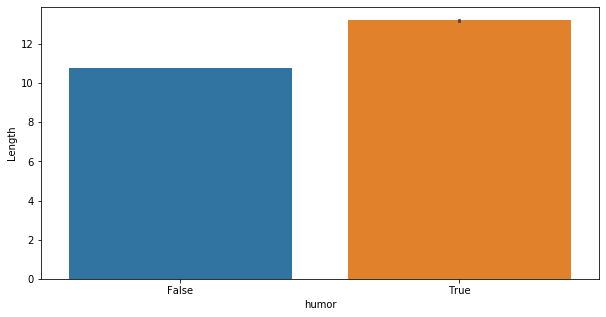

In [8]:
#plot a bar graph show true VS false (funny or not funny) jokes.
plt.figure(figsize=(10,5))
sns.barplot(x='humor',y='Length',data=df)
plt.show()

In [9]:
#Getting a list of all the words in the dataset into Dictonary 
Word_list = []
Word_dic = dict()
for i in list(df['text']):
    for j in i.split(' '):
        Word_list.append(j.upper())
len(Word_list)

2398856

In [10]:
from collections import Counter

In [11]:
Word_dic = Counter(Word_list)
Word_df = pd.DataFrame({'Word':list(Word_dic.keys()),'Frequency':list(Word_dic.values())})
Word_df.sort_values('Frequency',ascending=False,inplace=True)
Word_df.head()

,Word,Frequency
30,THE,81969
22,A,75714
99,TO,53737
20,YOU,34521
60,OF,32837


In [12]:
sync = list(Word_df['Word'].head(60))

In [13]:
len(Word_df)

142768

In [14]:
Word_df['Frequency'].describe()

count    142768.000000
mean         16.802477
std         433.752112
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max       81969.000000
Name: Frequency, dtype: float64

In [15]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Word_df['Frequency'].quantile(i))

14.0
16.0
19.0
24.0
30.0
39.0
55.0
85.0
176.0


In [16]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Word_df['Frequency'].quantile(i))

193.09700000000885
218.0
249.0
287.3980000000156
333.0
420.9320000000007
548.6989999999932
820.8639999999432
1633.6990000000224


In [17]:
Word_df = Word_df[Word_df.Frequency>=333.0]
len(Word_df)

716

In [18]:
Word_df.head()

,Word,Frequency
30,THE,81969
22,A,75714
99,TO,53737
20,YOU,34521
60,OF,32837


In [19]:
Final_Words = list(Word_df.Word)
Final = [x for x in Final_Words if x not in sync]
len(Final)

656

In [20]:
for i in ['','-','--','&','3','7','2','A:','6','Q:','...','?','5','10','!','1','9','4','8']:
    Final.remove(i)

In [21]:
len(Final)

637

In [22]:
def upp(lis):
    return [j.upper() for j in lis]
    
for i in Final:
    df[i] = df['text'].apply(lambda x: 1 if i in upp(x.split(' ')) else 0)
df.drop(['text'],axis=1,inplace=True)
df.head()

,humor,Length,AFTER,HER,BY,MAKE,(PHOTOS),INTO,HAS,WILL,...,MAJOR,WOMEN'S,STORE,STARS,WEIGHT,MISS,YEAR'S,FOOTBALL,QUESTIONS,BEAT
0,False,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# LAB 2- B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("/home/rahil/Documents/AIDI/ML programing/Assignments/Assignment2/google.csv")

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5.077000e+03
mean,50.211469,50.918732,49.449509,50.199217,41.572402,3.324412e+06
std,23.773018,24.010401,23.487776,23.762348,25.322971,1.751201e+06
min,15.580000,16.500000,15.290000,16.100000,11.782657,4.878000e+05
25%,34.189999,34.759998,33.669998,34.160000,24.326195,2.165700e+06
50%,41.020000,41.689999,40.360001,41.000000,31.036186,2.989300e+06
75%,58.759998,59.450001,57.990002,58.799999,51.314934,4.037000e+06
max,125.059998,127.300003,122.389999,124.639999,123.877579,2.774800e+07


In [4]:
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,45.7500,47.2500,45.65625,46.50000,31.572819,591800
1,2000-01-03,46.7500,46.9375,44.00000,45.09375,30.618002,3655600
2,2000-01-04,44.7500,45.7500,42.78125,42.81250,29.069048,2533200
3,2000-01-05,42.8125,44.1250,41.59375,43.43750,29.493437,3228000
4,2000-01-06,43.4375,43.8125,41.62500,42.25000,28.687130,2601000
5,2000-01-07,42.0000,44.2500,41.31250,43.43750,29.493437,1890600
6,2000-01-10,45.0000,47.3750,44.62500,47.21875,32.060841,2570000


In [5]:
'''Correlation- the relationships between two or more variables (or features) of a dataset.each data point in 
the dataset is an observation, and the features are the properties or attributes of those observations.
Cross-correlation is an established and reliable tool to compute the degree to which the two seismic time-series are dependent 
on each other.Several studies have relied on the cross-correlation method to obtain the inference on the seismic data.
'''
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999304,0.999166,0.998701,0.980822,-0.298361
High,0.999304,1.000000,0.998653,0.999301,0.978697,-0.289132
Low,0.999166,0.998653,1.000000,0.999262,0.984535,-0.306212
Close,0.998701,0.999301,0.999262,1.000000,0.982123,-0.296948
Adj Close,0.980822,0.978697,0.984535,0.982123,1.000000,-0.295280
Volume,-0.298361,-0.289132,-0.306212,-0.296948,-0.295280,1.000000


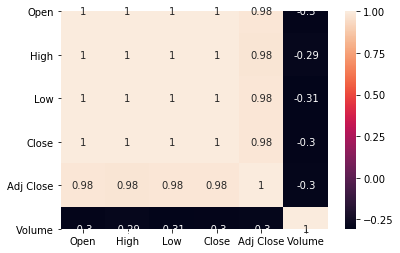

In [6]:
dataplot = sb.heatmap(df.corr(),  annot=True)
#plt.show()

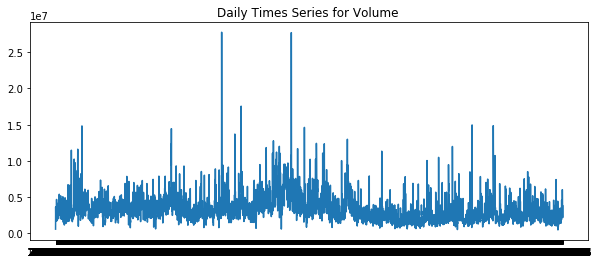

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(df['Date'],df['Volume'])
plt.title('Daily Times Series for Volume ');

In [10]:
count = (df['Open']>df["Close"]).count()

In [11]:
print(count)

5077


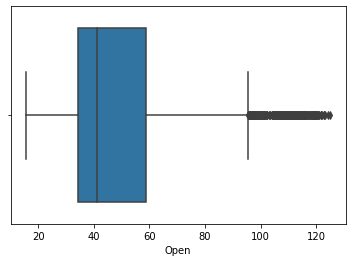

In [12]:
'''When exploring data, the outliers are the extreme values within the dataset. That means the outlier data points 
vary greatly from the expected values—either being much larger or significantly smaller.
'''
sb.boxplot(df['Open'])

In [13]:
#In the above graph, can clearly see that values above 80 are acting as the outliers.
print(np.where(df['Open']>80))

(array([  42,   44,   45,   46,   47,   48,   49,   50,   54,   56,   57,
         58,   59,   60,   61,   62,   64,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  134,  135,  136,  137,  138,  158,  159,  160,
        161,  162,  163,  164,  165,  166,  167,  168,  169,  170,  171,
        172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
        183,  184,  185,  186,  187,  188,  189,  190,  191,  192,  193,
        194,  195, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316,
       4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327,
       4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338,
       4339, 4340, 4341, 4342, 4343, 4344, 4370, 4371, 4373, 4374, 4375,
       4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4385, 4386, 4387,
       4389, 4390, 4392, 4393, 4394, 4396, 4397, 4398, 4399, 4409, 4410,
       4411, 4412, 4413, 4414, 4415, 4416, 4419, 4

#### Plotting boxplots to know outliers

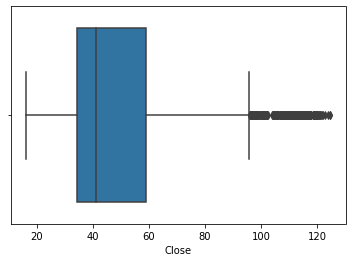

In [14]:
sb.boxplot(df['Close'])

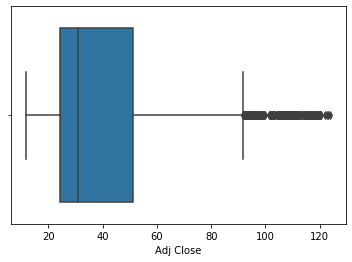

In [15]:
sb.boxplot(df['Adj Close'])

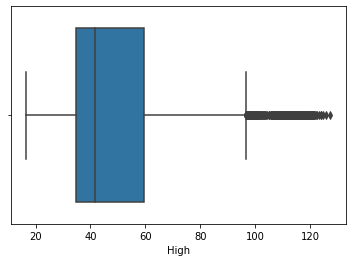

In [16]:
sb.boxplot(df['High'])

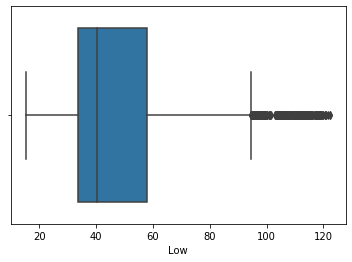

In [17]:
sb.boxplot(df['Low'])

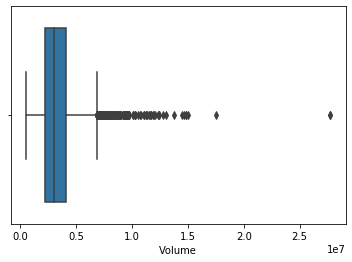

In [19]:
sb.boxplot(df['Volume'])